<h1>Сборный проект</h1>

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры хочет выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

<h1>Описание данных</h1>

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Портрет-пользователя" data-toc-modified-id="Портрет-пользователя-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li>

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/games.csv')
display(df.info())
display(df.head())
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


## Предобработка данных

Приведем названия столбцов к нижнему регистру

In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Изменим тип стобца year_of_release, т.к. год - это целое число.

In [4]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Заменим значение tbd в стобце user_score на nan, т.к. фактически это одно и то же.

In [5]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')
df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Теперь заменим все отсутсвующие строки в столбце rating на "unknown", чтобы в дальнейшем эти значения были указаны на графиках.

In [6]:
display(df['rating'].unique())
df['rating'] = df['rating'].fillna('unknown')
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Пропуски в столбцах critic_score и user_score заполним спец. значением.

In [7]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Откинем строки, где не указаны название / жанр / год релиза (~2% данных).

In [8]:
df = df.loc[df['name'].isna() == False]
print(df.info())
df = df.loc[df['year_of_release'].isna() == False]
print(df.info())
df = df.loc[df['genre'].isna() == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             164

Посчитаем суммарные продажи во всех регионах.

In [9]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


## Анализ данных

Посмотрим сколько игр выпускалось в год.

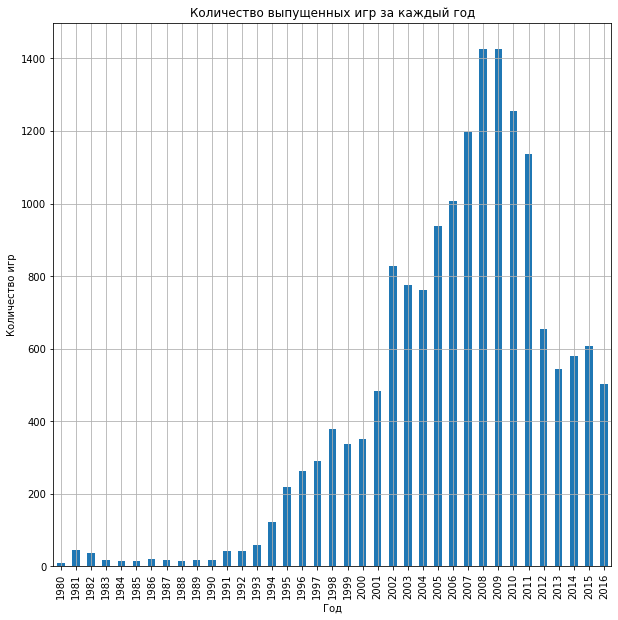

In [10]:
games_in_year = df.groupby('year_of_release')['name'].count()
games_in_year.plot(kind='bar', grid=True, figsize=(10, 10))
plt.title('Количество выпущенных игр за каждый год')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Посмотрим продажи на платформах с наивысшими суммарными продажами.

In [11]:
sales_in_year = df.groupby('platform')['sum_sales'].sum()
sales_in_year = sales_in_year.sort_values(ascending=False).reset_index()
display(sales_in_year)

,platform,sum_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Возьмем топ 5 платформ.

In [12]:
sales_in_year_top = sales_in_year[sales_in_year.index < 5]
display(sales_in_year_top)

,platform,sum_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


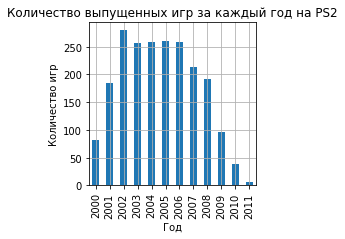

In [13]:
games_in_year = df[df['platform'] == 'PS2'].groupby('year_of_release')['name'].count()
games_in_year.plot(kind='bar', grid=True, figsize=(3, 3))
plt.title('Количество выпущенных игр за каждый год на PS2')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

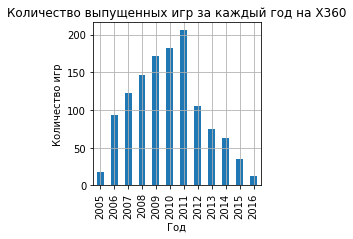

In [14]:
games_in_year = df[df['platform'] == 'X360'].groupby('year_of_release')['name'].count()
games_in_year.plot(kind='bar', grid=True, figsize=(3, 3))
plt.title('Количество выпущенных игр за каждый год на X360')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

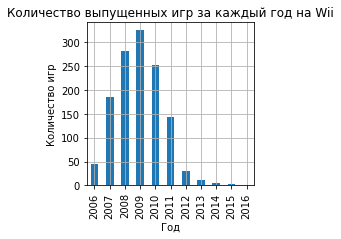

In [15]:
games_in_year = df[df['platform'] == 'Wii'].groupby('year_of_release')['name'].count()
games_in_year.plot(kind='bar', grid=True, figsize=(3, 3))
plt.title('Количество выпущенных игр за каждый год на Wii')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

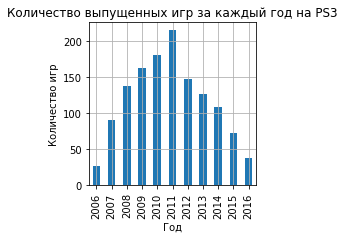

In [16]:
games_in_year = df[df['platform'] == 'PS3'].groupby('year_of_release')['name'].count()
games_in_year.plot(kind='bar', grid=True, figsize=(3, 3))
plt.title('Количество выпущенных игр за каждый год на PS3')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

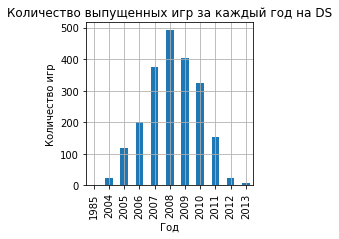

In [17]:
games_in_year = df[df['platform'] == 'DS'].groupby('year_of_release')['name'].count()
games_in_year.plot(kind='bar', grid=True, figsize=(3, 3))
plt.title('Количество выпущенных игр за каждый год на DS')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Платформы становятся популярными на следующий год после их выпуска, набирают популярность ~3 года, теряют популярность примерно столько же времени и уходят с рынка.

В связи с этим, для построения прогноза на 2017 год, необходимо учитывать данные за 2014+ года. В период с 2014 по 2017 должны найтись платформы на пике или на росте популярности.

In [18]:
df_actual = df[df['year_of_release'] >= 2014].reset_index(drop=True)
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,unknown,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98


Посмотрим лидеров по продажам.

In [19]:
sales_in_year_actual = df_actual.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).reset_index()
display(sales_in_year_actual)

,platform,sum_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


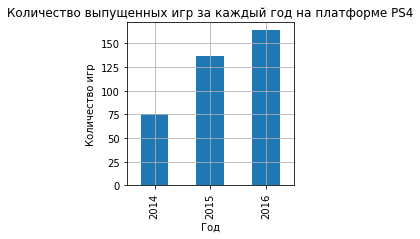

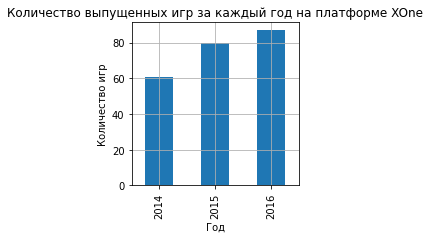

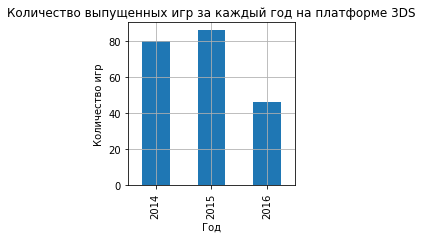

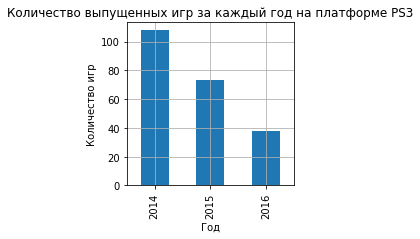

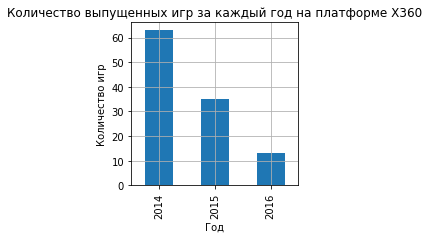

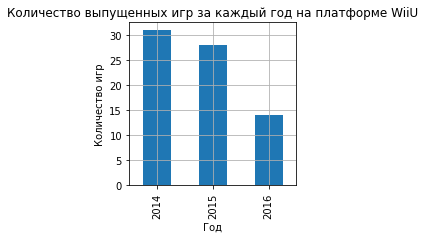

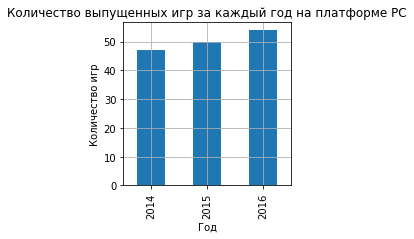

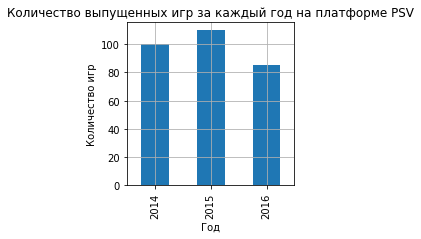

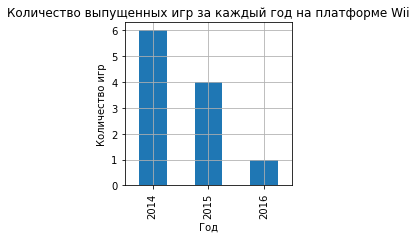

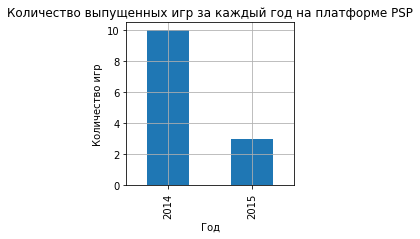

In [20]:
platform_actual = sales_in_year_actual['platform'].unique()
for i in platform_actual:
    games_in_year_actual = df_actual[df_actual['platform'] == i].groupby('year_of_release')['name'].count()
    games_in_year_actual.plot(kind='bar', grid=True, figsize=(3, 3))
    plt.title('Количество выпущенных игр за каждый год на платформе ' + str(i))
    plt.xlabel('Год')
    plt.ylabel('Количество игр')
    plt.show()

Потенциально прибыльными являются PS4, XOne и PC.

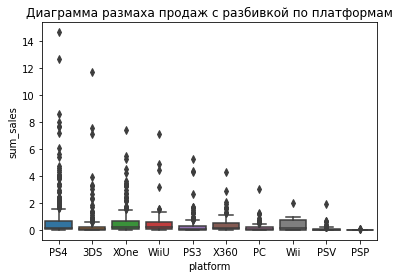

In [21]:
sns.boxplot(data=df_actual, x='platform', y='sum_sales').set_title('Диаграмма размаха продаж с разбивкой по платформам');

(0.0, 1.75)

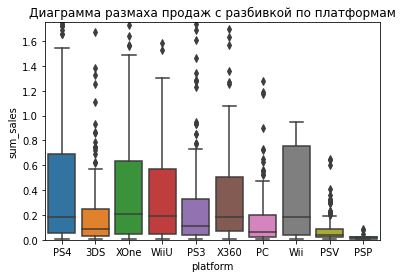

In [22]:
sns.boxplot(data=df_actual, x='platform', y='sum_sales').set_title('Диаграмма размаха продаж с разбивкой по платформам');
plt.ylim(0, 1.75)

Посмотрим как влияют на продажи отзывы пользователей и критиков (на примере топ 5 платформ по продажам).

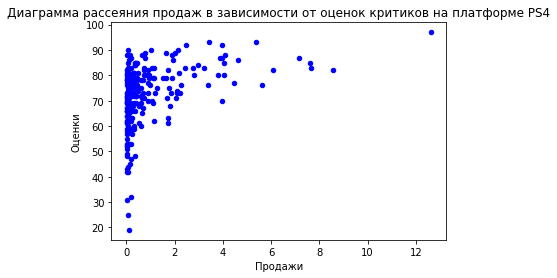

0.40266141068104083


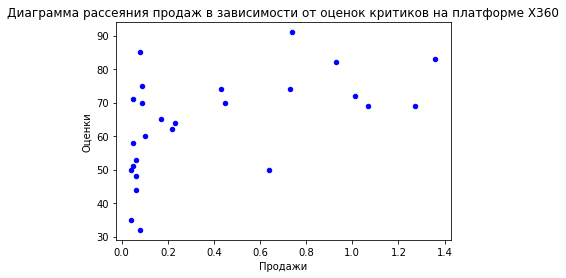

0.5257228356581523


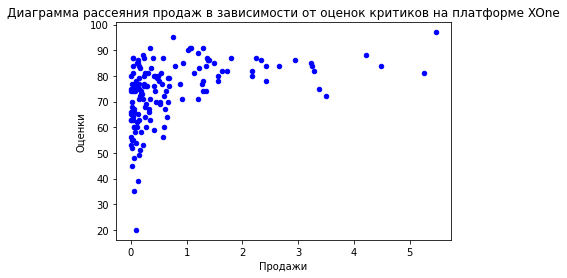

0.42867694370333226


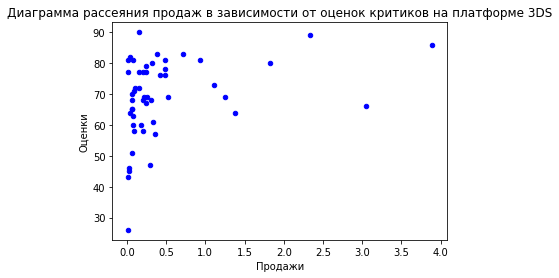

0.31411749286905105


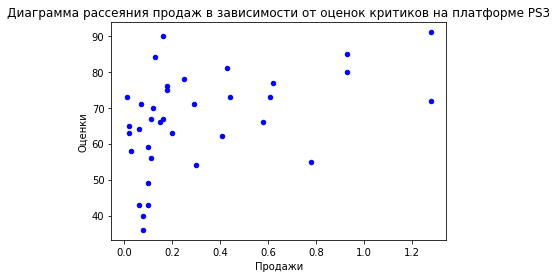

0.44657460493190704


In [23]:
for i in ('PS4', 'X360', 'XOne', '3DS', 'PS3'):
    df_actual.query('platform == @i & critic_score != -1').plot(x='sum_sales', y='critic_score', kind='scatter', c='blue')
    plt.title('Диаграмма рассеяния продаж в зависимости от оценок критиков на платформе ' + str(i))
    plt.xlabel('Продажи')
    plt.ylabel('Оценки')
    plt.show()
    print(df_actual.query('platform == @i & critic_score != -1')['sum_sales'].corr(df_actual.query('platform == @i & critic_score != -1')['critic_score']))

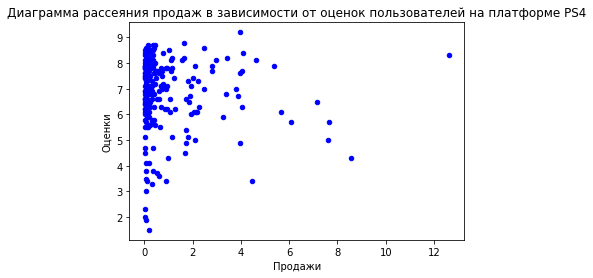

-0.040131589472697356


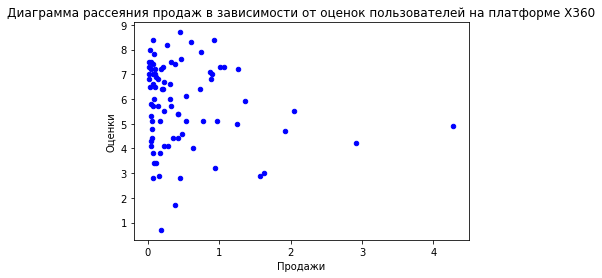

-0.138444570945665


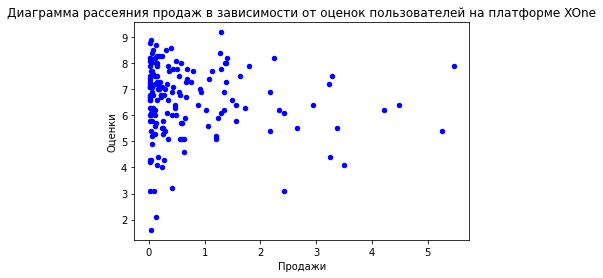

-0.0703839280647581


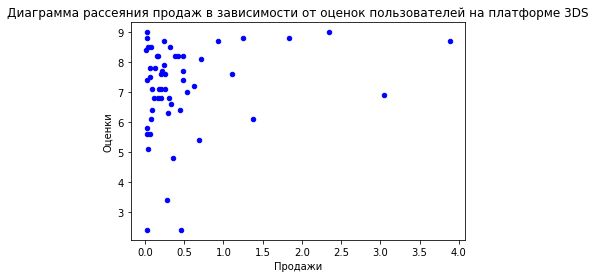

0.2151932718527028


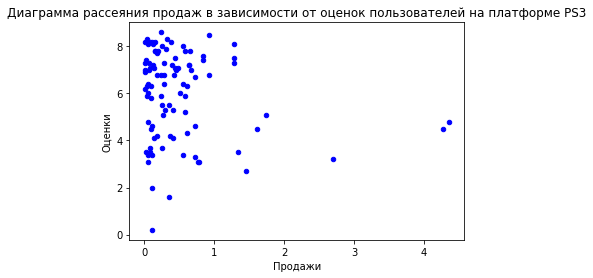

-0.16676141347662116


In [24]:
for i in ('PS4', 'X360', 'XOne', '3DS', 'PS3'):
    df_actual.query('platform == @i & user_score != -1').plot(x='sum_sales', y='user_score', kind='scatter', c='blue')
    plt.title('Диаграмма рассеяния продаж в зависимости от оценок пользователей на платформе ' + str(i))
    plt.xlabel('Продажи')
    plt.ylabel('Оценки')
    plt.show()
    print(df_actual.query('platform == @i & user_score != -1')['sum_sales'].corr(df_actual.query('platform == @i & user_score != -1')['user_score']))

Наблюдается зависимость между оценкой критиков и количеством продаж игры. От оценок пользователей продажи практически не зависят.

Посмотрим общую зависимость.

In [25]:
print(df_actual.query('user_score != -1')['sum_sales'].corr(df_actual.query('user_score != -1')['critic_score']))
df_actual.query('user_score != -1')['sum_sales'].corr(df_actual.query('user_score != -1')['user_score'])

0.17752291602352394


-0.013070305002484585

Присутствует небольшая зависимость продаж от оценок критиков.

Посмотрим на самые прибыльные жанры.

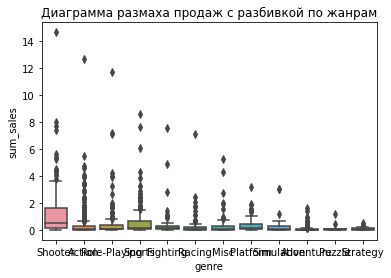

In [26]:
sns.boxplot(data=df_actual, x='genre', y='sum_sales').set_title('Диаграмма размаха продаж с разбивкой по жанрам');
sns.set(rc={'figure.figsize':(10,3)})

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: sum_sales, dtype: float64

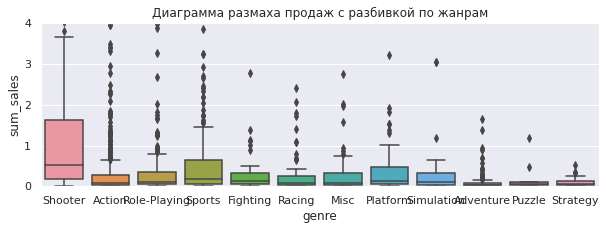

In [27]:
display(df_actual.groupby('genre')['sum_sales'].sum().sort_values(ascending=False))
sns.boxplot(data=df_actual, x='genre', y='sum_sales').set_title('Диаграмма размаха продаж с разбивкой по жанрам');
plt.ylim(0, 4)
sns.set(rc={'figure.figsize':(10,3)})

Самым прибыльным жанром является shooter. При этом жанры sports и platformer чуть чаще "выстреливают".

## Портрет пользователя

Определим для пользователей каждого региона:

самые популярные платформы (топ-5)

самые популярные жанры (топ-5)

влияет ли рейтинг ESRB на продажи в отдельном регионе?

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,WiiU,19.36
6,PC,7.23
7,PSV,2.52
8,Wii,2.08
9,PSP,0.00


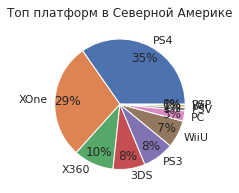

In [28]:
df_actual_sum = df_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
plt.pie(data=df_actual_sum, x='na_sales', labels='platform', autopct='%.0f%%', pctdistance=0.8);
plt.title('Топ платформ в Северной Америке')
df_actual_sum

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,X360,15.49
6,WiiU,13.15
7,PSV,3.53
8,Wii,2.59
9,PSP,0.00


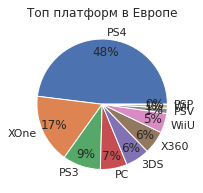

In [29]:
df_actual_sum = df_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
plt.pie(data=df_actual_sum, x='eu_sales', labels='platform', autopct='%.0f%%', pctdistance=0.8);
plt.title('Топ платформ в Европе')
df_actual_sum

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,PSP,0.36
6,XOne,0.32
7,X360,0.08
8,PC,0.00
9,Wii,0.00


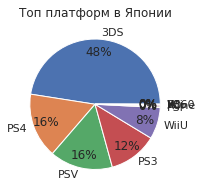

In [30]:
df_actual_sum = df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
plt.pie(data=df_actual_sum, x='jp_sales', labels='platform', autopct='%.0f%%', pctdistance=0.8);
plt.title('Топ платформ в Японии')
df_actual_sum

В Северной Америке и Европе распределения продаж примерно одинаковые: лидируют консоли (с явным преимуществом PS4 в Европе), далее идут консоли старого поколения, ПК и 3DS. В Японии очевидным лидером является 3DS, скорее всего это связано с популярностью данного бренда в Японии и удобством использования, т.к. это портативная консоль. При этом ПК находится внизу списка, что показывает любовь японцев к консолям.

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,Fighting,12.43
6,Racing,8.74
7,Platform,6.79
8,Adventure,5.64
9,Simulation,2.63


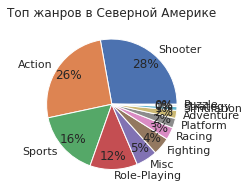

In [31]:
df_actual_sum = df_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
plt.pie(data=df_actual_sum, x='na_sales', labels='genre', autopct='%.0f%%', pctdistance=0.8);
plt.title('Топ жанров в Северной Америке')
df_actual_sum

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13
5,Misc,12.86
6,Simulation,7.30
7,Platform,6.80
8,Fighting,6.69
9,Adventure,6.49


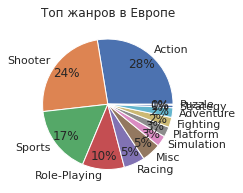

In [32]:
df_actual_sum = df_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
plt.pie(data=df_actual_sum, x='eu_sales', labels='genre', autopct='%.0f%%', pctdistance=0.8);
plt.title('Топ жанров в Европе')
df_actual_sum

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87
5,Adventure,3.60
6,Sports,3.26
7,Platform,2.69
8,Simulation,2.31
9,Racing,1.76


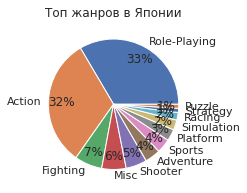

In [33]:
df_actual_sum = df_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
plt.pie(data=df_actual_sum, x='jp_sales', labels='genre', autopct='%.0f%%', pctdistance=0.8);
plt.title('Топ жанров в Японии')
df_actual_sum

Среди основных жанров во всем мире - Action и RPG. В Европе и Америке также популярны шутеры и спортивные игры. В Японии же такой любви к "стрелялкам" и спорту нет. Скорее всего это связано с миролюбивым образом жизни и образом жизни, где на спорт почти нет времени (работа, учеба и т.д.).

,rating,na_sales
0,M,96.42
1,unknown,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


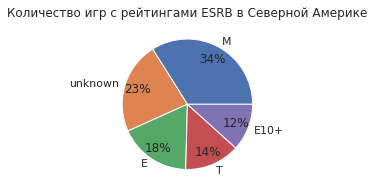

In [34]:
df_actual_sum = df_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
plt.pie(data=df_actual_sum, x='na_sales', labels='rating', autopct='%.0f%%', pctdistance=0.8);
plt.title('Количество игр с рейтингами ESRB в Северной Америке')
df_actual_sum

,rating,eu_sales
0,M,93.44
1,unknown,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


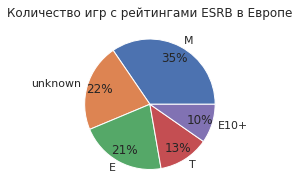

In [35]:
df_actual_sum = df_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
plt.pie(data=df_actual_sum, x='eu_sales', labels='rating', autopct='%.0f%%', pctdistance=0.8);
plt.title('Количество игр с рейтингами ESRB в Европе')
df_actual_sum

,rating,jp_sales
0,unknown,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


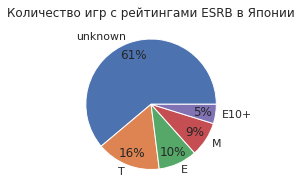

In [36]:
df_actual_sum = df_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
plt.pie(data=df_actual_sum, x='jp_sales', labels='rating', autopct='%.0f%%', pctdistance=0.8);
plt.title('Количество игр с рейтингами ESRB в Японии')
df_actual_sum

Японцы не так любят игры с рейтингом "Mature", у них семейный образ жизни, поэтому и игры им интересны семейные: с рейтингом "E" или "T". К тому же япония, будучи долгое время закрытым государством, старалась развиваться во всех сферах самостоятельно, поэтому в сфере игр у них популярны собственные разработки, которые часто существуют только в пределах японского рынка, а рейтинг ESRB скорее всего расчитан на игры, распространенные по всему миру.

Из-за того, что Япония долго была закрыта от всего мира, там сформировались свои особенности, которые выражаются и в сфере игроиндустрии.

## Проверка гипотез

Проверим гипотезы:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action и Sports разные.

1. Н0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, Н1- Средние пользовательские рейтинги платформ Xbox One и PC различаются. Проверку нулевой гипотезы проведем с помощью теста ttest_ind с учетом разных дисперсий, т.к. имеем две генеральные независящие друг от друга совокупности.

In [37]:
alpha = 0.05
results = st.ttest_ind(
    df_actual.query('platform == "XOne" & user_score != -1')['user_score'], 
    df_actual.query('platform == "PC" & user_score != -1')['user_score'],
    equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Значит, средние пользовательские рейтинги платформ Xbox One и PC примерно одинаковые.

2. Н0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые, Н - 1 Средние пользовательские рейтинги жанров Action и Sports различаются. Проверку нулевой гипотезы проведем с помощью теста ttest_ind с учетом разных дисперсий, т.к. имеем две генеральные независящие друг от друга совокупности.

In [38]:
alpha = 0.05
results = st.ttest_ind(
    df_actual.query('genre == "Action" & user_score != -1')['user_score'], 
    df_actual.query('genre == "Sports" & user_score != -1')['user_score'],
    equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Значит средние пользовательские рейтинги жанров Action и Sports различаются.

In [39]:
print(df_actual.query('genre == "Sports" & user_score != -1')['user_score'].mean())
df_actual.query('genre == "Action" & user_score != -1')['user_score'].mean()

5.2251968503937


6.760606060606061

## Общий вывод

В ходе данного проекта была получена требуемая информация для формирования прогноза на 2017 год в сфере игровой индустрии. Наиболее перспективными платформами являются PS4, XboxOne и PC. У данных платформ наблюдается рост продаж по всему миру. Среди игровых жанров стоит обратить внимание на shooter. Этот жанр является наиболее прибыльным и популярным. Так же можно присмотреться к жанрам sports и platformer. Эти жанры продаются в среднем несколько больше, чем все остальные. При этом стоит ориентироваться на американский и европейский рынки, т.к. японский рынок обладает своими особенностями.